In [64]:
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [65]:
import numpy as np 
import pandas as pd

In [25]:
train = pd.read_csv('C:/Users/15192/Desktop/数据挖掘/winemag-data-130k-v2.csv')

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [27]:
train1 = pd.read_csv('C:/Users/15192/Desktop/数据挖掘/winemag-data_first150k.csv')

In [28]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [29]:
data = pd.concat([train, train1], axis=0)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280901 entries, 0 to 150929
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             280901 non-null  int64  
 1   country                280833 non-null  object 
 2   description            280901 non-null  object 
 3   designation            197701 non-null  object 
 4   points                 280901 non-null  int64  
 5   price                  258210 non-null  float64
 6   province               280833 non-null  object 
 7   region_1               234594 non-null  object 
 8   region_2               111464 non-null  object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                280900 non-null  object 
 13  winery                 280901 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [31]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [32]:
print(data.isnull().sum)

<bound method DataFrame.sum of         Unnamed: 0  country  description  designation  points  price  \
0            False    False        False        False   False   True   
1            False    False        False        False   False  False   
2            False    False        False         True   False  False   
3            False    False        False        False   False  False   
4            False    False        False        False   False  False   
...            ...      ...          ...          ...     ...    ...   
150925       False    False        False         True   False  False   
150926       False    False        False        False   False  False   
150927       False    False        False        False   False  False   
150928       False    False        False        False   False  False   
150929       False    False        False         True   False  False   

        province  region_1  region_2  taster_name  taster_twitter_handle  \
0          False     False  

In [33]:
data1=data.dropna(axis=0)

In [34]:
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [ ]:
从中可以看到points和price为数值属性，将其离散化

In [89]:
number_data = ['points','price']
data1[number_data].describe()

,points,price
count,22387.000000,22387.000000
mean,89.537812,41.465404
std,2.809306,29.379374
min,80.000000,4.000000
25%,88.000000,25.000000
50%,90.000000,36.000000
75%,92.000000,50.000000
max,100.000000,2013.000000


In [ ]:
将points和price分成4个等级，points为低度，中低度,中度，高度，pirce为低价，中低价，中价，高价

points 0-88 88-90 90-92 92-100

price 0-25 25-36 36-50 50-2013

经过处理后的结果如下所示

In [90]:
bin = [0,88,90,92,100]
data1['points'] = pd.cut(data1['points'],bin)
data1['points'] = data1['points'].astype('str')
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(0, 88]",65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(0, 88]",19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(0, 88]",22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(0, 88]",69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(0, 88]",50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [91]:
bin = [0,25,36,50,2013]
data1['price'] = pd.cut(data1['price'],bin)
data1['price'] = data1['price'].astype('str')
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(0, 88]","(50, 2013]",Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(0, 88]","(0, 25]",California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(0, 88]","(0, 25]",California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(0, 88]","(50, 2013]",California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(0, 88]","(36, 50]",Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


In [92]:
data1 = data1[['points','price','country','winery']]
data1.head(5)

,points,price,country,winery
4,"(0, 88]","(50, 2013]",US,Sweet Cheeks
10,"(0, 88]","(0, 25]",US,Kirkland Signature
23,"(0, 88]","(0, 25]",US,Bianchi
25,"(0, 88]","(50, 2013]",US,Castello di Amorosa
35,"(0, 88]","(36, 50]",US,Erath


In [51]:
选取points,price,country以及winery进行挖掘
利用Apriori算法找出所有的频繁项集

NameError: name '选取points' is not defined

In [80]:
from efficient_apriori import apriori

In [93]:
data2 = list(zip(*[data1[c].values.tolist() for c in data1]))

In [94]:
itemsets, rules = apriori(data2, min_support=0.5, min_confidence=0.9)

In [95]:
print(rules)

[]


In [96]:
itemsets, rules = apriori(data2, min_support=0.25, min_confidence=0.9)
print(rules)

[{(0, 88]} -> {US}, {(0, 25]} -> {US}, {(36, 50]} -> {US}]


In [97]:
print(itemsets)

{1: {('(0, 88]',): 8282, ('US',): 22387, ('(0, 25]',): 6367, ('(36, 50]',): 5668}, 2: {('(0, 88]', 'US'): 8282, ('(0, 25]', 'US'): 6367, ('(36, 50]', 'US'): 5668}}


In [ ]:
可以看出points度数品级和酒的产地之间的关系也较为紧密

In [103]:
def createC1( dataSet ):
    C1 = []
    for transaction in np.array(dataSet):
        for item in transaction:
            if [item] not in C1:
                C1.append( [item] )
    C1.sort()
    return list(map( frozenset, C1 ))

def scanD( D, Ck, minSupport ):
    ssCnt = {}
    for tid in D:
        if Ck is not None:
            for can in Ck:
                if can.issubset( tid ):
                    ssCnt[ can ] = ssCnt.get( can, 0) + 1
    numItems = float( len( D ) )
    retList = []
    supportData = {}
    for key in ssCnt:
        support = ssCnt[ key ] / numItems
        if support >= minSupport:
            retList.insert( 0, key )
            supportData[ key ] = support
    return retList, supportData

In [104]:
def aprioriGen( Lk, k ):
    retList = []
    lenLk = len( Lk )
    for i in range( lenLk ):
        for j in range( i + 1, lenLk ):
            L1 = list( Lk[ i ] )[ : k - 2 ];
            L2 = list( Lk[ j ] )[ : k - 2 ];
            L1.sort();L2.sort()    
            if L1==L2:
                retList.append( Lk[ i ] | Lk[ j ] ) 
    return retList

def apriori( dataSet, minSupport = 0.5 ):
    C1 = createC1( dataSet )
    D =list( map( set, dataSet ))
    L1, suppData = scanD( D, C1, minSupport )
    L = [ L1 ]
    k = 2
    
    while ( len( L[ k - 2 ] ) > 0 ):
        Ck = aprioriGen( L[ k - 2 ], k )
        Lk, supK = scanD( D, Ck, minSupport )
        suppData.update( supK )
        L.append( Lk )
        k += 1
    return L, suppData

In [105]:
newData = list(map(set,np.array(data1)))
L, suppData = apriori(newData, 0.05)
L

[[frozenset({'(92, 100]'}),
  frozenset({'(88, 90]'}),
  frozenset({'(90, 92]'}),
  frozenset({'(25, 36]'}),
  frozenset({'(36, 50]'}),
  frozenset({'(0, 25]'}),
  frozenset({'US'}),
  frozenset({'(50, 2013]'}),
  frozenset({'(0, 88]'})],
 [frozenset({'(50, 2013]', '(92, 100]'}),
  frozenset({'(92, 100]', 'US'}),
  frozenset({'(36, 50]', '(88, 90]'}),
  frozenset({'(0, 25]', '(88, 90]'}),
  frozenset({'(25, 36]', '(88, 90]'}),
  frozenset({'(88, 90]', 'US'}),
  frozenset({'(36, 50]', '(90, 92]'}),
  frozenset({'(25, 36]', '(90, 92]'}),
  frozenset({'(50, 2013]', '(90, 92]'}),
  frozenset({'(90, 92]', 'US'}),
  frozenset({'(0, 88]', '(25, 36]'}),
  frozenset({'(25, 36]', 'US'}),
  frozenset({'(0, 88]', '(36, 50]'}),
  frozenset({'(36, 50]', 'US'}),
  frozenset({'(0, 25]', '(0, 88]'}),
  frozenset({'(0, 25]', 'US'}),
  frozenset({'(0, 88]', 'US'}),
  frozenset({'(50, 2013]', 'US'})],
 [frozenset({'(50, 2013]', '(92, 100]', 'US'}),
  frozenset({'(36, 50]', '(88, 90]', 'US'}),
  frozenset(

In [106]:
for tmp, num in suppData.items():
    print(tmp, ':', num)

frozenset({'(0, 88]'}) : 0.3699468441506231
frozenset({'(50, 2013]'}) : 0.23187564211372672
frozenset({'US'}) : 1.0
frozenset({'(0, 25]'}) : 0.2844061285567517
frozenset({'(36, 50]'}) : 0.25318265064546386
frozenset({'(25, 36]'}) : 0.23053557868405772
frozenset({'(90, 92]'}) : 0.24514227006744985
frozenset({'(88, 90]'}) : 0.23719122705141377
frozenset({'(92, 100]'}) : 0.14771965873051324
frozenset({'(50, 2013]', 'US'}) : 0.23187564211372672
frozenset({'(0, 88]', 'US'}) : 0.3699468441506231
frozenset({'(0, 25]', 'US'}) : 0.2844061285567517
frozenset({'(0, 88]', '(0, 25]'}) : 0.18064055031938178
frozenset({'(36, 50]', 'US'}) : 0.25318265064546386
frozenset({'(0, 88]', '(36, 50]'}) : 0.06222361191763077
frozenset({'(25, 36]', 'US'}) : 0.23053557868405772
frozenset({'(0, 88]', '(25, 36]'}) : 0.09501049716353241
frozenset({'(90, 92]', 'US'}) : 0.24514227006744985
frozenset({'(90, 92]', '(50, 2013]'}) : 0.07450752668959663
frozenset({'(90, 92]', '(25, 36]'}) : 0.055165944521374015
frozenset(

In [ ]:
导出关联规则，计算其支持度和置信度，并对规则进行评价

In [109]:
#输入频繁项集列表、频繁项集的支持度字典、最小置信度
#输出包含置信度的规则列表
def generateRules(L, supportData, minConf=0.5):
    bigRuleList = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]   #规则后件集合
            if (i > 1):
                rulesFromConseq(freqSet, H1, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H1, supportData, bigRuleList, minConf)
    return bigRuleList

#生成候选规则集合
def calcConf(freqSet, H, supportData, brl, minConf=0.5):
    prunedH = []
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq]   #集合相减
        if conf >= minConf:
            print(f'{freqSet-conseq} --> {conseq} conf:{conf}'+ "  support: "+ str(supportData[freqSet]))
            brl.append((freqSet-conseq, conseq, conf, supportData[freqSet]))
            prunedH.append(conseq)
    return prunedH

#对规则进行评估
def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.5):
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m+1)
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)

In [110]:
rules = generateRules(L, suppData, minConf=0.05)

frozenset({'(92, 100]'}) --> frozenset({'(50, 2013]'}) conf:0.5624433020864833  support: 0.08308393263947828
frozenset({'(50, 2013]'}) --> frozenset({'(92, 100]'}) conf:0.358312463879792  support: 0.08308393263947828
frozenset({'(92, 100]'}) --> frozenset({'US'}) conf:1.0  support: 0.14771965873051324
frozenset({'US'}) --> frozenset({'(92, 100]'}) conf:0.14771965873051324  support: 0.14771965873051324
frozenset({'(36, 50]'}) --> frozenset({'(88, 90]'}) conf:0.24558927311220893  support: 0.0621789431366418
frozenset({'(88, 90]'}) --> frozenset({'(36, 50]'}) conf:0.2621468926553672  support: 0.0621789431366418
frozenset({'(0, 25]'}) --> frozenset({'(88, 90]'}) conf:0.23810271713522854  support: 0.06771787197927369
frozenset({'(88, 90]'}) --> frozenset({'(0, 25]'}) conf:0.28549905838041434  support: 0.06771787197927369
frozenset({'(25, 36]'}) --> frozenset({'(88, 90]'}) conf:0.2823096299166828  support: 0.06508241390092465
frozenset({'(88, 90]'}) --> frozenset({'(25, 36]'}) conf:0.2743879

In [111]:
def getlift(rules, suppData):
    lift = []
    for rule in rules:
        freqSet_conseq = rule[0]
        conseq = rule[1]
        lift_val = float(rule[3]) / float(suppData[rule[1]])
        lift.append([freqSet_conseq, conseq, lift_val])
    return lift

In [112]:
lift = getlift(rules, suppData)
lift

[[frozenset({'(92, 100]'}), frozenset({'(50, 2013]'}), 0.358312463879792],
 [frozenset({'(50, 2013]'}), frozenset({'(92, 100]'}), 0.5624433020864833],
 [frozenset({'(92, 100]'}), frozenset({'US'}), 0.14771965873051324],
 [frozenset({'US'}), frozenset({'(92, 100]'}), 1.0],
 [frozenset({'(36, 50]'}), frozenset({'(88, 90]'}), 0.2621468926553672],
 [frozenset({'(88, 90]'}), frozenset({'(36, 50]'}), 0.24558927311220893],
 [frozenset({'(0, 25]'}), frozenset({'(88, 90]'}), 0.28549905838041434],
 [frozenset({'(88, 90]'}), frozenset({'(0, 25]'}), 0.23810271713522854],
 [frozenset({'(25, 36]'}), frozenset({'(88, 90]'}), 0.2743879472693032],
 [frozenset({'(88, 90]'}), frozenset({'(25, 36]'}), 0.2823096299166828],
 [frozenset({'US'}), frozenset({'(88, 90]'}), 1.0],
 [frozenset({'(88, 90]'}), frozenset({'US'}), 0.23719122705141377],
 [frozenset({'(36, 50]'}), frozenset({'(90, 92]'}), 0.34402332361516036],
 [frozenset({'(90, 92]'}), frozenset({'(36, 50]'}), 0.3330980945659845],
 [frozenset({'(25, 36

In [ ]:
利用Lift进行评价

In [ ]:
对挖掘结果进行可视化分析

In [117]:
import matplotlib.pyplot as plt

def show(x,y,title,K):
    plt.figure(figsize=(12,5)) 
    plt.xticks(rotation=270)
    plt.bar(x=x, height=y, label='d', color='r', alpha=1)
    for xx, yy in zip(x, y):
        plt.text(xx, yy, str(yy), ha='center', va='bottom', fontsize=10, rotation=0)
    plt.title(title)
    plt.xlabel("rule")
    plt.ylabel(K)
    plt.show()

In [118]:
rule = []
sup = []
conf = []
for tmp in rules[:15]:
    rule.append(str(tmp[0])+"->"+str(tmp[1]))
    conf.append(round(tmp[2], 2))
    sup.append(round(tmp[3], 2))

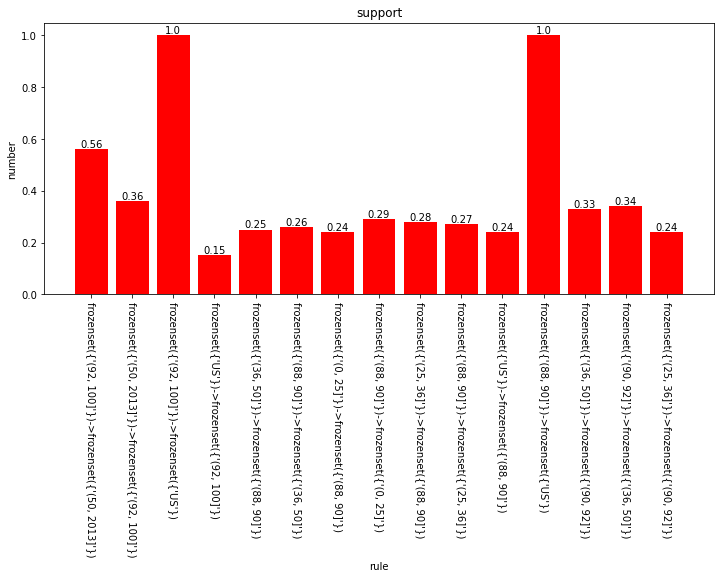

In [119]:
show(rule,conf,"support","number")

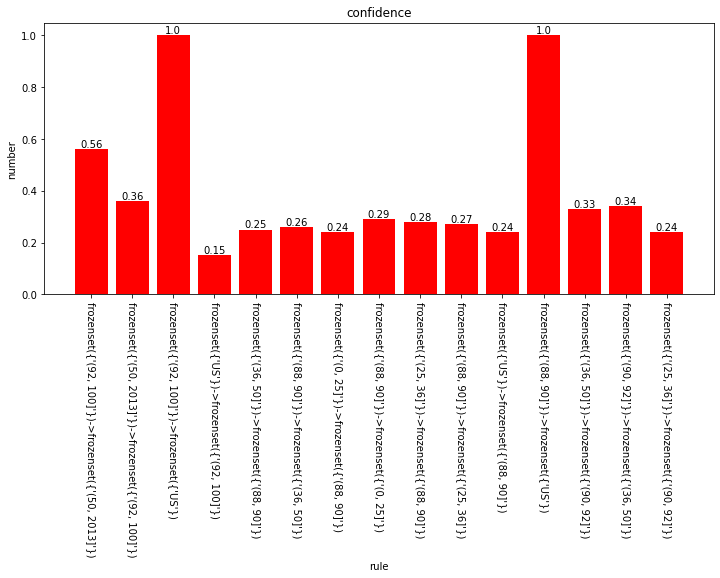

In [120]:
show(rule,conf,"confidence","number")

In [ ]:
92，100]->'US' 和（88，90]->'US'有较高的置信度，说明高价酒为美国的产地比较高